In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib import rc

print ("Modules imported")

def convert_to_dict(line):
    # Split the line into key-value pairs
    pairs = line.split(';')
    # Split each pair into key and value and store in a dictionary
    return dict(pair.split('=') for pair in pairs)

Modules imported


In [ ]:
# List of marker styles
# markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
markers = ['o', 'v', '^', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
# List of colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# List of linestyles
linestyles = ['-', '--', '-.', '-', ':']
markerSize = 5
capSize=4       # Error bar cap size
fontSize = 10

figSize = (4, 2.5)
# figSize = (2.2, 2.2)
labelPadding = 4
# Specify the file path
wns3VaryLoad_file = 'wns3VaryLoadResults.log'
dispLegend = False

rc('font',**{'family':'serif','serif':['Times New Roman']})


In [4]:

# Load the file as a DataFrame
with open(wns3VaryLoad_file, 'r') as f:
    VL_lines = f.readlines()

# Apply the convert_to_dict function to each line
VL_data = [convert_to_dict(line) for line in VL_lines]

# Convert the list of dictionaries into a DataFrame
VL_df = pd.DataFrame(VL_data)


# Convert necessary columns to numeric
list_of_numeric_columns = ['simID', 'videoQuality', 'twtWakeIntervalMultiplier', 'randSeed', 'nSTA', 'current_mA', 'TimeAwakeForThisSTA_us', 'TimeAsleepForThisSTA_us', 'TimeElapsedForThisSTA_us', 'EffectiveDutyCycle', 'energyPerTotBit_JPerBit', 'UL_throughput_kbps', 'UL_latency_usPerPkt', 'UL_latency_90th_us', 'UL_latency_95th_us', 'UL_latency_99th_us', 'UplinkRetriesThisSta', 'UplinkExpiredMpduThisSta']

for column in list_of_numeric_columns:
    VL_df[column] = pd.to_numeric(VL_df[column], errors='coerce')



# Sort the data frame in ascending order of nSTA
VL_df = VL_df.sort_values(by='nSTA')


# Fetch sorted unique values of nSTA for plotting
nSTA_unique = VL_df['nSTA'].unique()
print (nSTA_unique)


#fetch unique values of useCase
useCase_unique = VL_df['useCase'].unique()
# sort the useCase_unique
useCase_unique = sorted(useCase_unique)
print (useCase_unique)

legendLabels = ['CAM', 'dTWT-1', 'dTWT-2', 'dTWT-3']


# Print all the column headers
# print(VL_df.columns)

# Find the number of rows in which UL_throughput_kbps is 0
print("Number of rows in which UL_throughput_kbps is 0: ", VL_df[VL_df['UL_throughput_kbps'] == 0].shape[0])



[ 1  4  8 12 16 20 24 28 32]
['cam', 'dTwt1', 'dTwt2', 'dTwt3']
Number of rows in which UL_throughput_kbps is 0:  0


/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following fam

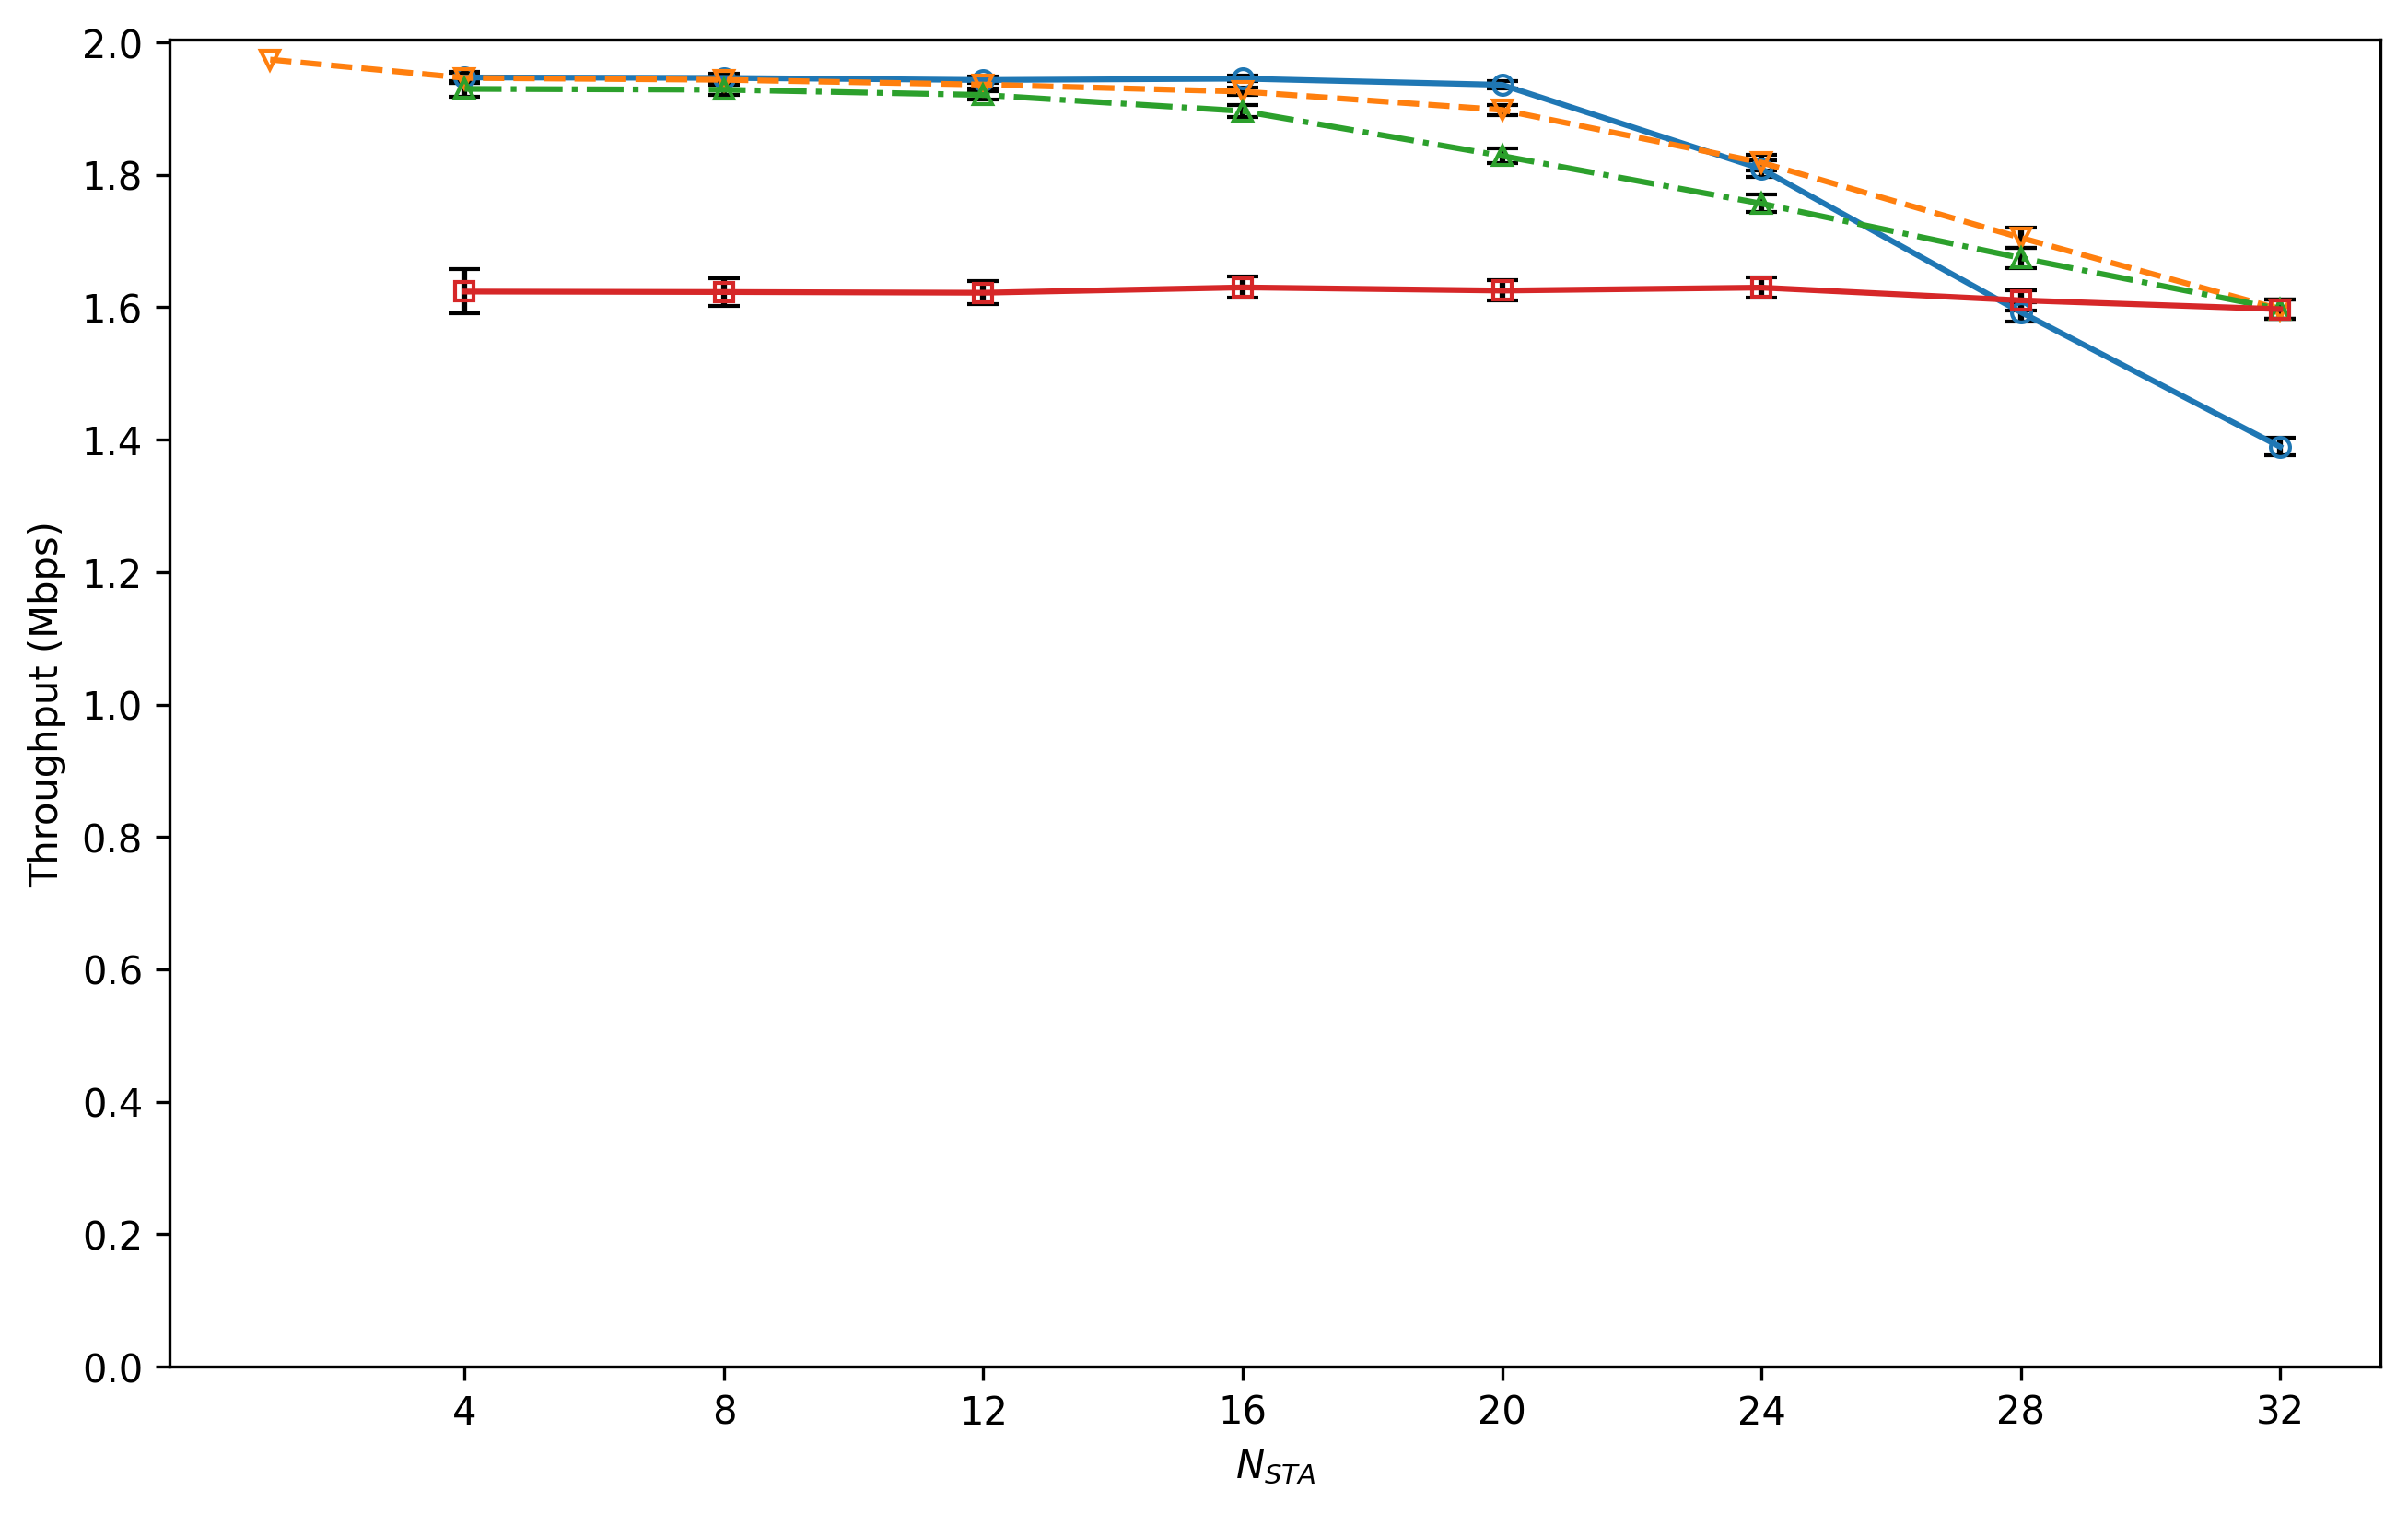

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 600  # Save at 600 DPI for sharper images

# Plot throughput - with confidence interval (alpha = 0.05)
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Larger figure, higher DPI
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Plotting the metrics for use cases
for jj, useCase in enumerate(useCase_unique):
    VL_df_thisUseCase = VL_df[VL_df['useCase'] == useCase]

    x, y, yerr_low, yerr_high = [], [], [], []
    for nSta in VL_df_thisUseCase['nSTA'].unique():
        VL_df_thisNSta = VL_df_thisUseCase[VL_df_thisUseCase['nSTA'] == nSta]
        mean_throughput = VL_df_thisNSta['UL_throughput_kbps'].mean()
        sem = stats.sem(VL_df_thisNSta['UL_throughput_kbps'])
        df = len(VL_df_thisNSta['UL_throughput_kbps']) - 1

        ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_throughput, scale=sem)
        x.append(nSta)
        y.append(mean_throughput / 1000)
        yerr_low.append((mean_throughput - ci_low) / 1000)
        yerr_high.append((ci_high - mean_throughput) / 1000)

    # Plot with error bars
    plt.errorbar(
        x, y, yerr=[yerr_low, yerr_high],
        ecolor='black', marker=markers[jj], markersize=markerSize,
        markerfacecolor='none', label=legendLabels[jj],
        linestyle=linestyles[jj], capsize=capSize, linewidth=1.5
    )

# Axis formatting
plt.yticks(np.arange(0, 2.1, 0.2))
plt.xticks(np.arange(4, 33, 4))
plt.rcParams['font.size'] = fontSize
plt.xlabel(r'$N_{STA}$', labelpad=labelPadding)
plt.ylabel('Throughput (Mbps)', labelpad=labelPadding)
plt.show()

/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following fam

  useCase  nSta  UL_throughput_mbps    CI_low   CI_high
0     cam     4            1.947089  0.008143  0.008143
1     cam     8            1.946420  0.006067  0.006067
2     cam    12            1.943174  0.004698  0.004698
3     cam    16            1.945272  0.004111  0.004111
4     cam    20            1.935970  0.005968  0.005968
5     cam    24            1.808925  0.012600  0.012600
6     cam    28            1.592683  0.014434  0.014434
7     cam    32            1.389382  0.012999  0.012999
  useCase  nSta  UL_throughput_mbps    CI_low   CI_high
0   dTwt1     1            1.974110       NaN       NaN
1   dTwt1     4            1.946392  0.008135  0.008135
2   dTwt1     8            1.943532  0.006195  0.006195
3   dTwt1    12            1.936295  0.005280  0.005280
4   dTwt1    16            1.925769  0.005663  0.005663
5   dTwt1    20            1.898088  0.007287  0.007287
6   dTwt1    24            1.818540  0.011450  0.011450
7   dTwt1    28            1.705004  0.015119  0

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 640x480 with 0 Axes>

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

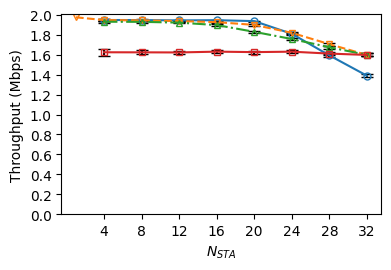

In [ ]:
# Plot throughput - with confidence interval (alpha = 0.05)
# plt.figure(figsize=figSize)
plt.figure()
fig, ax = plt.subplots(figsize=figSize)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Plotting the metrics for useCases
for jj, useCase in enumerate(useCase_unique):
    

    # useCase = useCase_unique [0]
    VL_df_thisUseCase = VL_df[VL_df['useCase'] == useCase]

    # For every unique value of nSTA, calculate the mean throughput and 95% confidence interval. 
    x = []
    y = []
    yerr_low = []
    yerr_high = []
    for i, nSta in enumerate(VL_df_thisUseCase['nSTA'].unique()):
        VL_df_thisNSta = VL_df_thisUseCase[VL_df_thisUseCase['nSTA'] == nSta]
        mean_throughput = VL_df_thisNSta['UL_throughput_kbps'].mean()
        
        # Calculate the standard error of the mean
        sem = stats.sem(VL_df_thisNSta['UL_throughput_kbps'])
        
        # Calculate the degrees of freedom
        df = len(VL_df_thisNSta['UL_throughput_kbps']) - 1
        
        # Calculate the 95% confidence interval
        ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_throughput, scale=sem)
        # Print as a dict
        # print({'nSTA': nSta, 'UL_throughput_kbps': mean_throughput, 'CI_low': ci_low, 'CI_high': ci_high})
        x.append(nSta)
        y.append(mean_throughput/1000)
        yerr_low.append((mean_throughput - ci_low)/1000)
        yerr_high.append((ci_high - mean_throughput)/1000)

    # Plot
    plt.errorbar(x, y, yerr=[yerr_low, yerr_high], ecolor='black', marker=markers[jj], markersize=markerSize, markerfacecolor='none', label=legendLabels[jj] , linestyle=linestyles[jj], capsize=capSize)
    # plt.errorbar(x, y, yerr=[yerr_low, yerr_high], color=colors[jj], ecolor='black', marker=markers[jj], markersize=markerSize, markerfacecolor='none', label=legendLabels[jj] , linestyle=linestyles[jj], capsize=capSize)
    
    # plt.errorbar(x, y, yerr=[yerr_low, yerr_high], ecolor='black', markersize=markerSize, markerfacecolor='none', capsize=capSize)
    # create a list of strings - useCase is repeated for each nSTA
    useCase_label = [useCase]*len(x)
    # Create a dataframe with the calculated values

    
    VL_throughput_df = pd.DataFrame({'useCase': useCase_label, 'nSta': x, 'UL_throughput_mbps': y, 'CI_low': yerr_low, 'CI_high': yerr_high})
    # Pretty Print the dataframe completely
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(VL_throughput_df)
    
    

# Set yticks in steps of 0.2 from the range of x
plt.yticks(np.arange(0, 2.1, 0.2))
# Set xticks from 4 to 32 in steps of 4
plt.xticks(np.arange(4, 33, 4))
plt.rcParams['font.size'] = fontSize
plt.xlabel(r'$N_{STA}$', labelpad=labelPadding)
plt.ylabel('Throughput (Mbps)', labelpad=labelPadding)
# plt.title('Throughput vs Duty Cycle (%)')
if dispLegend:
    plt.legend()
    # Display the legend outside the plot, 4 columns, no frame, add some padding
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False)

plt.savefig('wns3Apr2024VlThroughput.eps', format='eps', bbox_inches='tight')
# # Save as a png file
# plt.savefig('wns3Apr2024VlThroughput.png', format='png', bbox_inches='tight')





    

/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following fam

  useCase  nSta  latency95_ms    CI_low   CI_high
0     cam     4      3.668500  0.079187  0.079187
1     cam     8      4.561750  0.116221  0.116221
2     cam    12      5.795000  0.138593  0.138593
3     cam    16      9.330125  0.204442  0.204442
4     cam    20     35.080400  0.605678  0.605678
5     cam    24     70.487750  0.881977  0.881977
6     cam    28     99.658143  1.424428  1.424428
7     cam    32    132.950758  2.197832  2.197832
  useCase  nSta  latency95_ms    CI_low   CI_high
0   dTwt1     1      3.600000       NaN       NaN
1   dTwt1     4     20.656500  0.042201  0.042201
2   dTwt1     8     45.253589  0.044535  0.044535
3   dTwt1    12     70.749667  0.081450  0.081450
4   dTwt1    16     98.134309  0.225321  0.225321
5   dTwt1    20    134.868111  0.571657  0.571657
6   dTwt1    24    180.070439  0.972550  0.972550
7   dTwt1    28    229.530714  1.481034  1.481034
8   dTwt1    32    289.833367  2.092209  2.092209
  useCase  nSta  latency95_ms    CI_low   CI_high


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

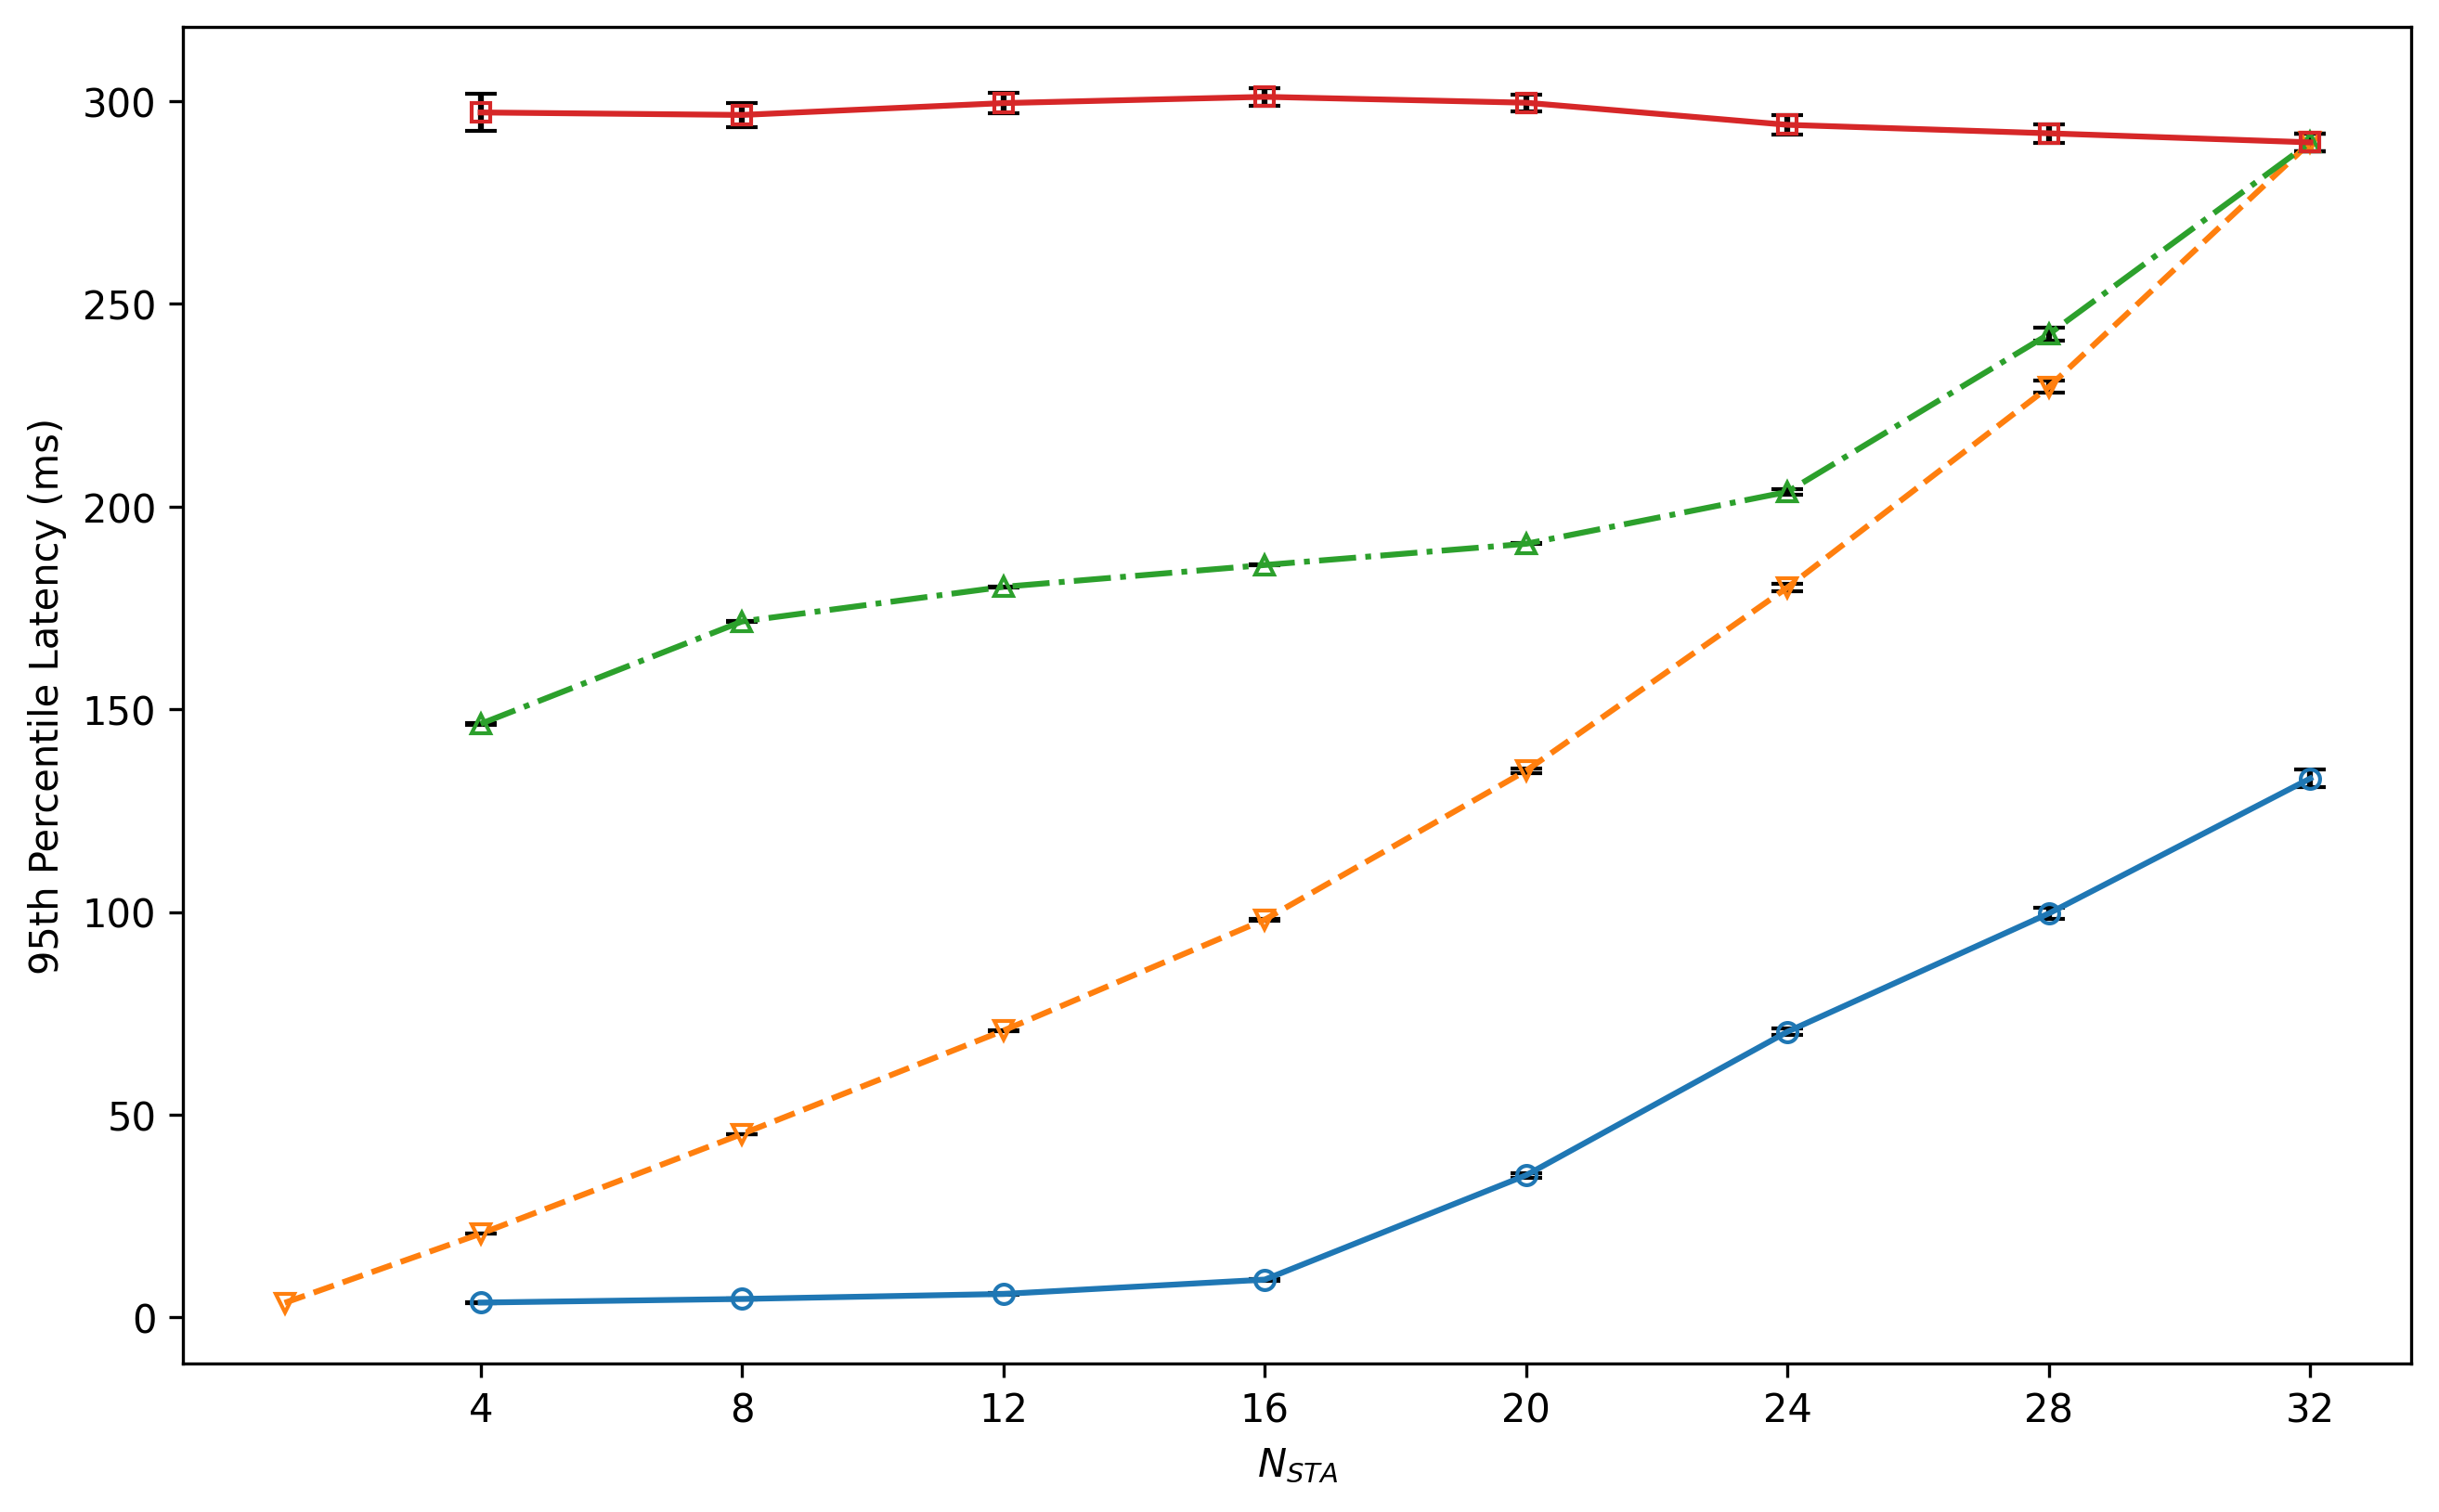

In [6]:
plt.rcParams['figure.dpi'] = 300       # For screen display
plt.rcParams['savefig.dpi'] = 600      # For high-quality export

# Create the figure with defined size and dpi
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Plot latency metrics for each use case
for jj, useCase in enumerate(useCase_unique):
    VL_df_thisUseCase = VL_df[VL_df['useCase'] == useCase]

    x, y, yerr_low, yerr_high = [], [], [], []

    for nSta in VL_df_thisUseCase['nSTA'].unique():
        VL_df_thisNSta = VL_df_thisUseCase[VL_df_thisUseCase['nSTA'] == nSta]
        mean_latency95 = VL_df_thisNSta['UL_latency_95th_us'].mean()
        sem = stats.sem(VL_df_thisNSta['UL_latency_95th_us'])
        df = len(VL_df_thisNSta['UL_latency_95th_us']) - 1

        ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_latency95, scale=sem)
        x.append(nSta)
        y.append(mean_latency95 / 1000)  # Convert to ms
        yerr_low.append((mean_latency95 - ci_low) / 1000)
        yerr_high.append((ci_high - mean_latency95) / 1000)

    # Plot error bars
    plt.errorbar(
        x, y, yerr=[yerr_low, yerr_high],
        ecolor='black', marker=markers[jj], markersize=markerSize, 
        markerfacecolor='none', label=legendLabels[jj],
        linestyle=linestyles[jj], capsize=capSize, linewidth=1.5
    )

    # Optionally print the calculated table
    useCase_label = [useCase] * len(x)
    VL_latency95_df = pd.DataFrame({
        'useCase': useCase_label,
        'nSta': x,
        'latency95_ms': y,
        'CI_low': yerr_low,
        'CI_high': yerr_high
    })
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(VL_latency95_df)

# Axis ticks and labels
plt.xticks(np.arange(4, 33, 4))
plt.xlabel(r'$N_{STA}$', labelpad=labelPadding)
plt.ylabel('95th Percentile Latency (ms)', labelpad=labelPadding)
plt.show()

/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following fam

  useCase  nSta  latency95_ms    CI_low   CI_high
0     cam     4      3.668500  0.079187  0.079187
1     cam     8      4.561750  0.116221  0.116221
2     cam    12      5.795000  0.138593  0.138593
3     cam    16      9.330125  0.204442  0.204442
4     cam    20     35.080400  0.605678  0.605678
5     cam    24     70.487750  0.881977  0.881977
6     cam    28     99.658143  1.424428  1.424428
7     cam    32    132.950758  2.197832  2.197832
  useCase  nSta  latency95_ms    CI_low   CI_high
0   dTwt1     1      3.600000       NaN       NaN
1   dTwt1     4     20.656500  0.042201  0.042201
2   dTwt1     8     45.253589  0.044535  0.044535
3   dTwt1    12     70.749667  0.081450  0.081450
4   dTwt1    16     98.134309  0.225321  0.225321
5   dTwt1    20    134.868111  0.571657  0.571657
6   dTwt1    24    180.070439  0.972550  0.972550
7   dTwt1    28    229.530714  1.481034  1.481034
8   dTwt1    32    289.833367  2.092209  2.092209
  useCase  nSta  latency95_ms    CI_low   CI_high


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 640x480 with 0 Axes>

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

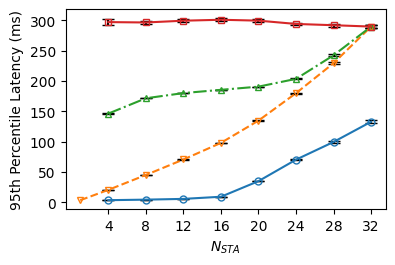

In [ ]:
# Plot latency - with confidence interval (alpha = 0.05)

plt.figure()
fig, ax = plt.subplots(figsize=figSize)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Plotting the metrics for useCases
for jj, useCase in enumerate(useCase_unique):
    

    # useCase = useCase_unique [0]
    VL_df_thisUseCase = VL_df[VL_df['useCase'] == useCase]

    # For every unique value of nSTA, calculate 95th percentile latency and 95% confidence interval. 
    x = []
    y = []
    yerr_low = []
    yerr_high = []
    for i, nSta in enumerate(VL_df_thisUseCase['nSTA'].unique()):
        VL_df_thisNSta = VL_df_thisUseCase[VL_df_thisUseCase['nSTA'] == nSta]
        mean_latency95 = VL_df_thisNSta['UL_latency_95th_us'].mean()
        
        # Calculate the standard error of the mean
        sem = stats.sem(VL_df_thisNSta['UL_latency_95th_us'])
        
        # Calculate the degrees of freedom
        df = len(VL_df_thisNSta['UL_latency_95th_us']) - 1
        
        # Calculate the 95% confidence interval
        ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_latency95, scale=sem)

        x.append(nSta)
        y.append(mean_latency95/1000)
        yerr_low.append((mean_latency95 - ci_low)/1000)
        yerr_high.append((ci_high - mean_latency95)/1000)

    # Plot
    plt.errorbar(x, y, yerr=[yerr_low, yerr_high], ecolor='black', marker=markers[jj], markersize=markerSize, markerfacecolor='none', label=legendLabels[jj] , linestyle=linestyles[jj], capsize=capSize)

    # create a list of strings - useCase is repeated for each nSTA
    useCase_label = [useCase]*len(x)
    # Create a dataframe with the calculated values

    
    VL_latency95_df = pd.DataFrame({'useCase': useCase_label, 'nSta': x, 'latency95_ms': y, 'CI_low': yerr_low, 'CI_high': yerr_high})
    # Pretty Print the dataframe completely
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(VL_latency95_df)
    
    

# Set yticks from 0 till max value
# plt.yticks(np.arange(0, 21, 2))
    
# Set xticks from 4 to 32 in steps of 4
plt.xticks(np.arange(4, 33, 4))
plt.rcParams['font.size'] = fontSize
plt.xlabel(r'$N_{STA}$', labelpad=labelPadding)
plt.ylabel('95th Percentile Latency (ms)', labelpad=labelPadding)
if dispLegend:
    plt.legend()
    # Display the legend outside the plot, two columns, horizontal layout, no frame
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.savefig('wns3Apr2024Vllatency95.eps', format='eps', bbox_inches='tight')
    

/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following fam

  useCase  nSta  energyPerBit_nJ     CI_low    CI_high
0     cam     4        84.963082   0.331688   0.331688
1     cam     8        87.753461   0.286961   0.286961
2     cam    12        90.503088   0.216524   0.216524
3     cam    16        93.431167   0.197108   0.197108
4     cam    20        97.816449   0.457178   0.457178
5     cam    24       112.777958   1.964405   1.964405
6     cam    28       152.704558  27.838078  27.838078
7     cam    32       176.338783  15.086810  15.086810
  useCase  nSta  energyPerBit_nJ    CI_low   CI_high
0   dTwt1     1        80.426100       NaN       NaN
1   dTwt1     4        25.906305  0.080777  0.080777
2   dTwt1     8        16.493613  0.037147  0.037147
3   dTwt1    12        13.268504  0.029554  0.029554
4   dTwt1    16        11.658261  0.025778  0.025778
5   dTwt1    20        10.768148  0.033005  0.033005
6   dTwt1    24        10.359664  0.056852  0.056852
7   dTwt1    28        10.351006  0.151434  0.151434
8   dTwt1    32        10.12

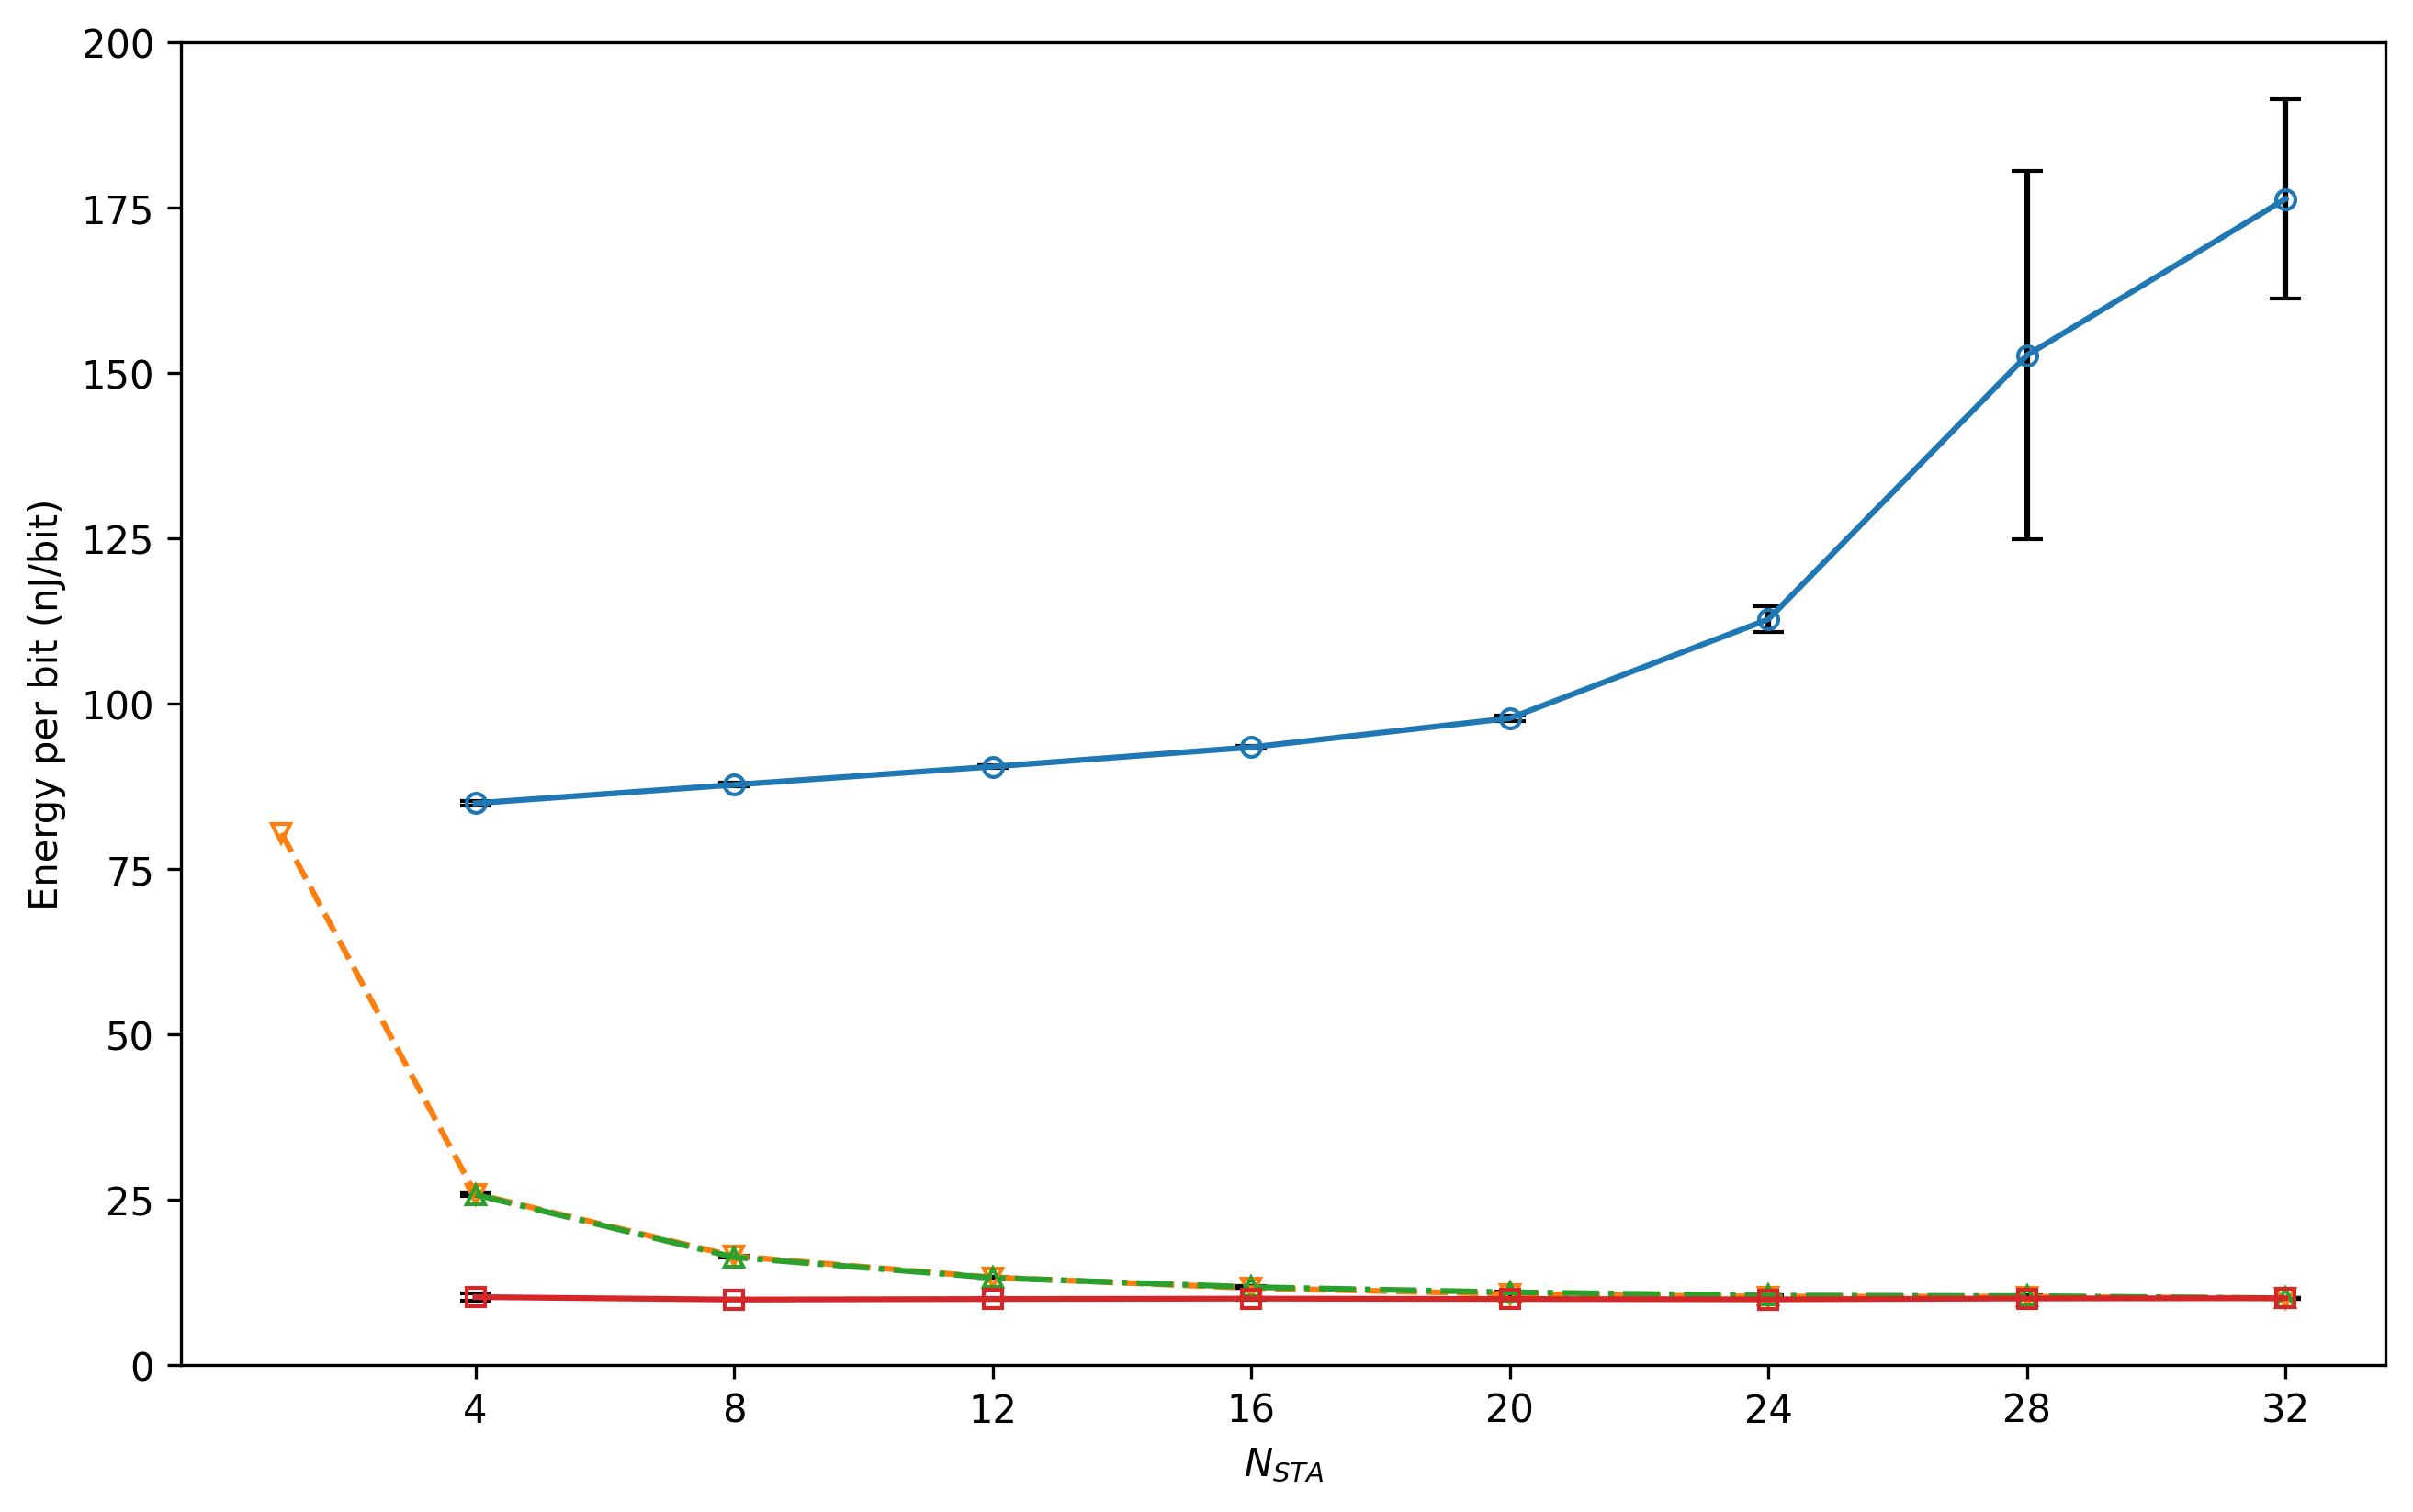

In [7]:

# Configure high-DPI and figure settings
plt.rcParams['figure.dpi'] = 300        # DPI for display
plt.rcParams['savefig.dpi'] = 600       # DPI for saved figures (publication quality)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Plotting metrics for use cases
for jj, useCase in enumerate(useCase_unique):

    VL_df_thisUseCase = VL_df[VL_df['useCase'] == useCase]

    x, y, yerr_low, yerr_high = [], [], [], []

    for nSta in VL_df_thisUseCase['nSTA'].unique():
        VL_df_thisNSta = VL_df_thisUseCase[VL_df_thisUseCase['nSTA'] == nSta]
        mean_energyPerBit = VL_df_thisNSta['energyPerTotBit_JPerBit'].mean()

        # Standard error and confidence interval
        sem = stats.sem(VL_df_thisNSta['energyPerTotBit_JPerBit'])
        df = len(VL_df_thisNSta['energyPerTotBit_JPerBit']) - 1
        ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_energyPerBit, scale=sem)

        x.append(nSta)
        y.append(mean_energyPerBit * 1e9)  # Convert to nJ/bit
        yerr_low.append((mean_energyPerBit - ci_low) * 1e9)
        yerr_high.append((ci_high - mean_energyPerBit) * 1e9)

    # Error-bar plot (mean ± CI)
    plt.errorbar(
        x, y, yerr=[yerr_low, yerr_high],
        ecolor='black', marker=markers[jj], markersize=markerSize,
        markerfacecolor='none', label=legendLabels[jj],
        linestyle=linestyles[jj], capsize=capSize, linewidth=1.5
    )

    # Optional: print computed CI values
    useCase_label = [useCase] * len(x)
    VL_energyPerBit_df = pd.DataFrame({
        'useCase': useCase_label, 'nSta': x, 'energyPerBit_nJ': y,
        'CI_low': yerr_low, 'CI_high': yerr_high
    })
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(VL_energyPerBit_df)

# Axis configuration
plt.ylim(0, 200)
plt.xticks(np.arange(4, 33, 4))
plt.xlabel(r'$N_{STA}$', labelpad=labelPadding)
plt.ylabel('Energy per bit (nJ/bit)', labelpad=labelPadding)
plt.show()


/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/safi/NS3-project/EHRL/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following fam

  useCase  nSta  energyPerBit_nJ     CI_low    CI_high
0     cam     4        84.963082   0.331688   0.331688
1     cam     8        87.753461   0.286961   0.286961
2     cam    12        90.503088   0.216524   0.216524
3     cam    16        93.431167   0.197108   0.197108
4     cam    20        97.816449   0.457178   0.457178
5     cam    24       112.777958   1.964405   1.964405
6     cam    28       152.704558  27.838078  27.838078
7     cam    32       176.338783  15.086810  15.086810
  useCase  nSta  energyPerBit_nJ    CI_low   CI_high
0   dTwt1     1        80.426100       NaN       NaN
1   dTwt1     4        25.906305  0.080777  0.080777
2   dTwt1     8        16.493613  0.037147  0.037147
3   dTwt1    12        13.268504  0.029554  0.029554
4   dTwt1    16        11.658261  0.025778  0.025778
5   dTwt1    20        10.768148  0.033005  0.033005
6   dTwt1    24        10.359664  0.056852  0.056852
7   dTwt1    28        10.351006  0.151434  0.151434
8   dTwt1    32        10.12

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 640x480 with 0 Axes>

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

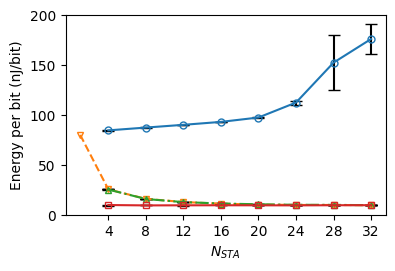

In [ ]:
# Plot energyPerBit - with confidence interval (alpha = 0.05)

plt.figure()
fig, ax = plt.subplots(figsize=figSize)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Plotting the metrics for useCases
for jj, useCase in enumerate(useCase_unique):
    

    # useCase = useCase_unique [0]
    VL_df_thisUseCase = VL_df[VL_df['useCase'] == useCase]

    # For every unique value of nSTA, calculate energyPerBit and 95% confidence interval. 
    x = []
    y = []
    yerr_low = []
    yerr_high = []
    for i, nSta in enumerate(VL_df_thisUseCase['nSTA'].unique()):
        VL_df_thisNSta = VL_df_thisUseCase[VL_df_thisUseCase['nSTA'] == nSta]
        mean_energyPerBit = VL_df_thisNSta['energyPerTotBit_JPerBit'].mean()
        
        # Calculate the standard error of the mean
        sem = stats.sem(VL_df_thisNSta['energyPerTotBit_JPerBit'])
        
        # Calculate the degrees of freedom
        df = len(VL_df_thisNSta['energyPerTotBit_JPerBit']) - 1
        
        # Calculate the 95% confidence interval
        ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_energyPerBit, scale=sem)

        x.append(nSta)
        y.append(mean_energyPerBit*1e9)
        yerr_low.append((mean_energyPerBit - ci_low)*1e9)
        yerr_high.append((ci_high - mean_energyPerBit)*1e9)

    # Plot
    plt.errorbar(x, y, yerr=[yerr_low, yerr_high], ecolor='black', marker=markers[jj], markersize=markerSize, markerfacecolor='none', label=legendLabels[jj] , linestyle=linestyles[jj], capsize=capSize)

    # create a list of strings - useCase is repeated for each nSTA
    useCase_label = [useCase]*len(x)
    # Create a dataframe with the calculated values

    
    VL_energyPerBit_df = pd.DataFrame({'useCase': useCase_label, 'nSta': x, 'energyPerBit_nJ': y, 'CI_low': yerr_low, 'CI_high': yerr_high})
    # Pretty Print the dataframe completely
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(VL_energyPerBit_df)
    
    

# Set ylim from 0 to 200
plt.ylim(0, 200)
    
# Set xticks from 4 to 32 in steps of 4
plt.xticks(np.arange(4, 33, 4))
plt.rcParams['font.size'] = fontSize
plt.xlabel(r'$N_{STA}$', labelpad=labelPadding)
plt.ylabel('Energy per bit (nJ/bit)', labelpad=labelPadding)
if dispLegend:
    plt.legend()
    # Display the legend outside the plot, two columns, horizontal layout, no frame
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.savefig('wns3Apr2024VlenergyPerBit.eps', format='eps', bbox_inches='tight')
    